# Project A : Malliavin

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x=100
r=0.03
sigma=0.2
T=1

K1=100
K2=110

In [3]:
def trajectories_and_gaussian(x, r, sigma, T, M, N, seed = 42):
    
    np.random.seed(seed)
    
    gaussian=np.random.randn(N, M+1)
    exp_gaussian=np.exp((r-(1/2)*(sigma**2))*(T/M)+sigma*np.sqrt(T/M)*gaussian)
    exp_gaussian[:, 0] = x
    trajectories=np.cumprod(exp_gaussian,axis=1)
    
    return trajectories, gaussian

In [4]:
def monte_carlo(sample):
    
    estimate_expectation = np.mean(sample)
    
    #calculation of the 95% confidence interval
    std_dev = np.std(sample)
    confidence_interval=estimate_expectation-1.96 * std_dev/np.sqrt(len(sample)), estimate_expectation+1.96 * std_dev/np.sqrt(len(sample))
    
    return [estimate_expectation,std_dev**2,confidence_interval]

In [5]:
def pricing(N, M):
    # List of N
    X = list(range(1000, N+1, 1000))
    # Lists for prices, P1 for option 1 and P2 for option 2
    P1 = []
    P2 = []
    # Lists for empirical variances of the estimator
    V1 = []
    V2 = []
    for i in X:
        trajectories = trajectories_and_gaussian(x, r, sigma, T, M, i, seed=42)[0]
        stock_integral = (T/M) * np.sum(trajectories, axis=1)
        payoff1 = np.exp(-r*T) * np.maximum(stock_integral-K1, 0)
        payoff2 = np.exp(-r*T) * np.where((stock_integral >= K1) & (stock_integral <= K2), 1, 0)
        P1.append(monte_carlo(payoff1)[0])
        P2.append(monte_carlo(payoff2)[0])
        V1.append(monte_carlo(payoff1)[1])
        V2.append(monte_carlo(payoff2)[1])
        
        if i == N:
            result1 = monte_carlo(payoff1)
            result2 = monte_carlo(payoff2)
            print(f"For N={N} and M={M}:\n"
                  f"Option 1:\n"
                  f"\t- Estimated price: {result1[0]}\n"
                  f"\t- Empirical variance: {result1[1]}\n"
                  f"\t- 95% confidence interval: {result1[2]}\n"
                  f"Option 2:\n"
                  f"\t- Estimated price: {result2[0]}\n"
                  f"\t- Empirical variance: {result2[1]}\n"
                  f"\t- 95% confidence interval: {result2[2]}")

    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 10))

    # Plot for P1 against X on the primary y-axis
    color = 'tab:blue'
    ax1.set_xlabel('N (Number of simulations)')
    ax1.set_ylabel('Estimated Price', color=color)
    ax1.plot(X, P1, color=color, label='Estimated Price')
    ax1.tick_params(axis='y', labelcolor=color)

    # Secondary y-axis for V1
    ax1_2 = ax1.twinx()
    color = 'tab:red'
    ax1_2.set_ylabel('Empirical Variance', color=color)
    ax1_2.plot(X, V1, color=color, label='Empirical Variance')
    ax1_2.tick_params(axis='y', labelcolor=color)

    # Title for the first plot
    ax1.set_title(f'Option 1: Evolution of Estimated Price and Empirical Variance with N for M={M}')

    # Combine legends for the first plot
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax1_2.get_legend_handles_labels()
    ax1_2.legend(lines + lines2, labels + labels2, loc='upper right')

    # Plot for P2 against X on the secondary y-axis
    color = 'tab:blue'
    ax2.set_xlabel('N (Number of simulations)')
    ax2.set_ylabel('Estimated Price', color=color)
    ax2.plot(X, P2, color=color, label='Estimated Price')
    ax2.tick_params(axis='y', labelcolor=color)

    # Secondary y-axis for V2
    ax2_2 = ax2.twinx()
    color = 'tab:red'
    ax2_2.set_ylabel('Empirical Variance', color=color)
    ax2_2.plot(X, V2, color=color, label='Empirical Variance')
    ax2_2.tick_params(axis='y', labelcolor=color)

    # Title for the second plot
    ax2.set_title(f'Option 2: Evolution of Estimated Price and Empirical Variance with N for M={M}')

    # Combine legends for the second plot
    lines, labels = ax2.get_legend_handles_labels()
    lines2, labels2 = ax2_2.get_legend_handles_labels()
    ax2_2.legend(lines + lines2, labels + labels2, loc='upper right')

    plt.tight_layout()
    plt.show()

### Question a)

For N=70000 and M=50:
Option 1:
	- Estimated price: 6.422168871788345
	- Empirical variance: 71.18121527626914
	- 95% confidence interval: (6.359667471049148, 6.484670272527541)
Option 2:
	- Estimated price: 0.3069103317385268
	- Empirical variance: 0.20364580890769168
	- 95% confidence interval: (0.30356726697803316, 0.3102533964990204)


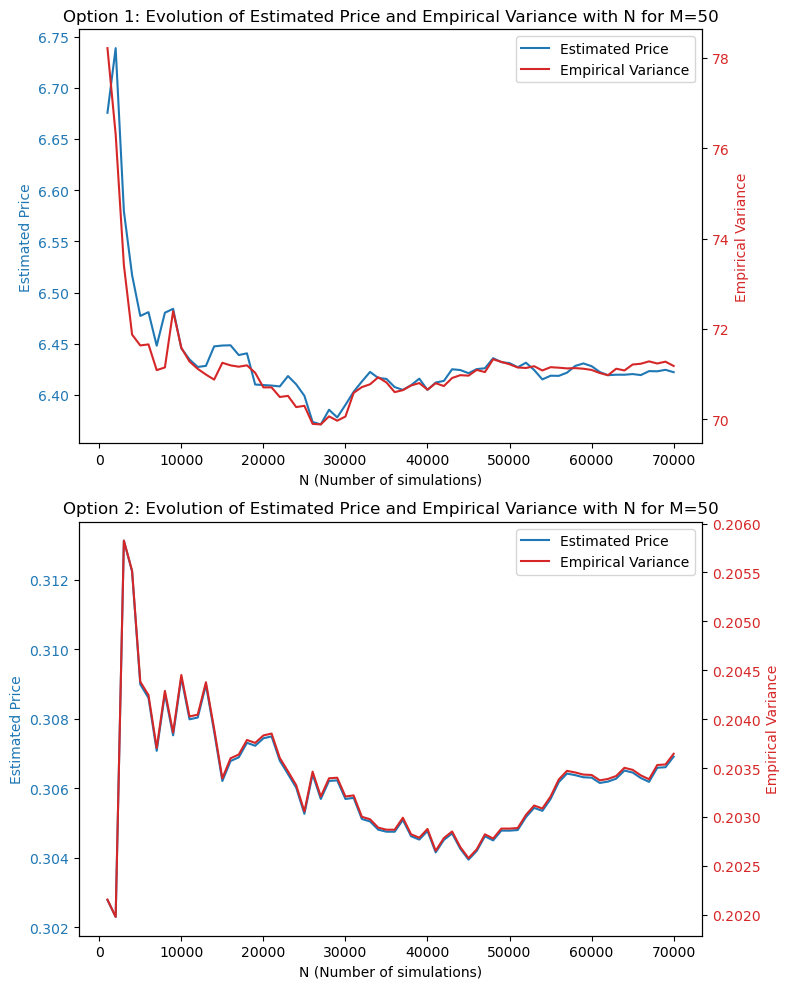

For N=70000 and M=150:
Option 1:
	- Estimated price: 5.614056829785804
	- Empirical variance: 62.57849906230998
	- 95% confidence interval: (5.555453860334252, 5.672659799237357)
Option 2:
	- Estimated price: 0.29845359208903255
	- Empirical variance: 0.20055840878346334
	- 95% confidence interval: (0.29513596560703725, 0.30177121857102784)


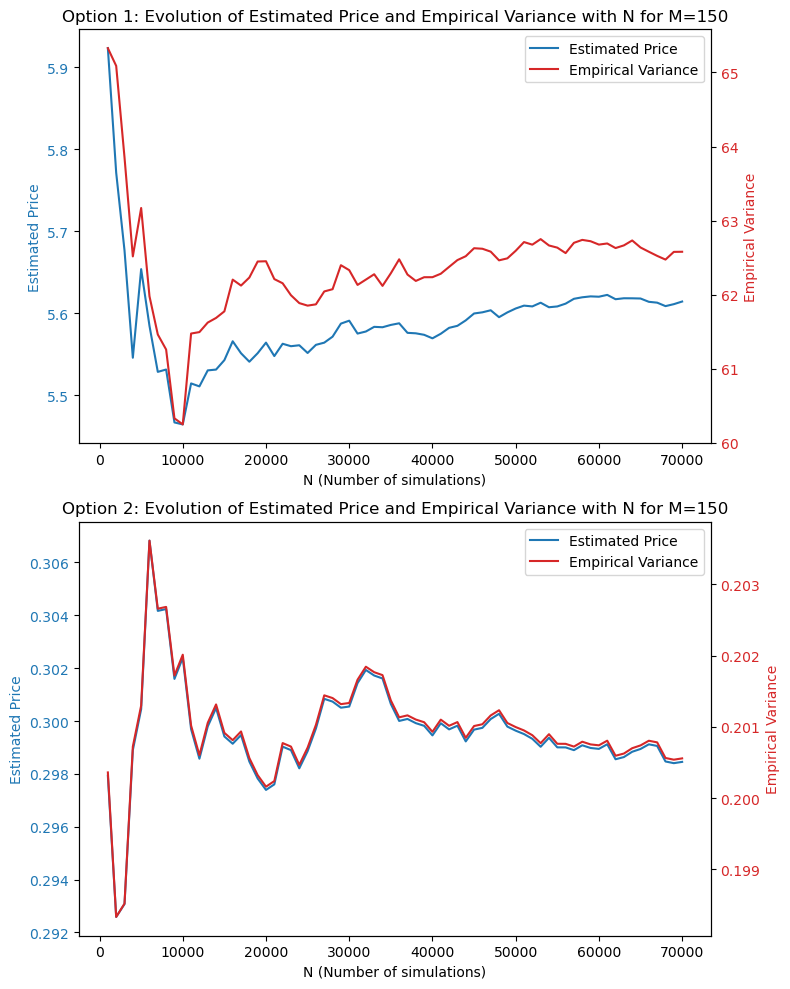

For N=70000 and M=250:
Option 1:
	- Estimated price: 5.510100592953239
	- Empirical variance: 61.833333655566456
	- 95% confidence interval: (5.45184758143437, 5.568353604472108)
Option 2:
	- Estimated price: 0.2975663276012167
	- Empirical variance: 0.20022619423295834
	- 95% confidence interval: (0.29425144999570774, 0.3008812052067257)


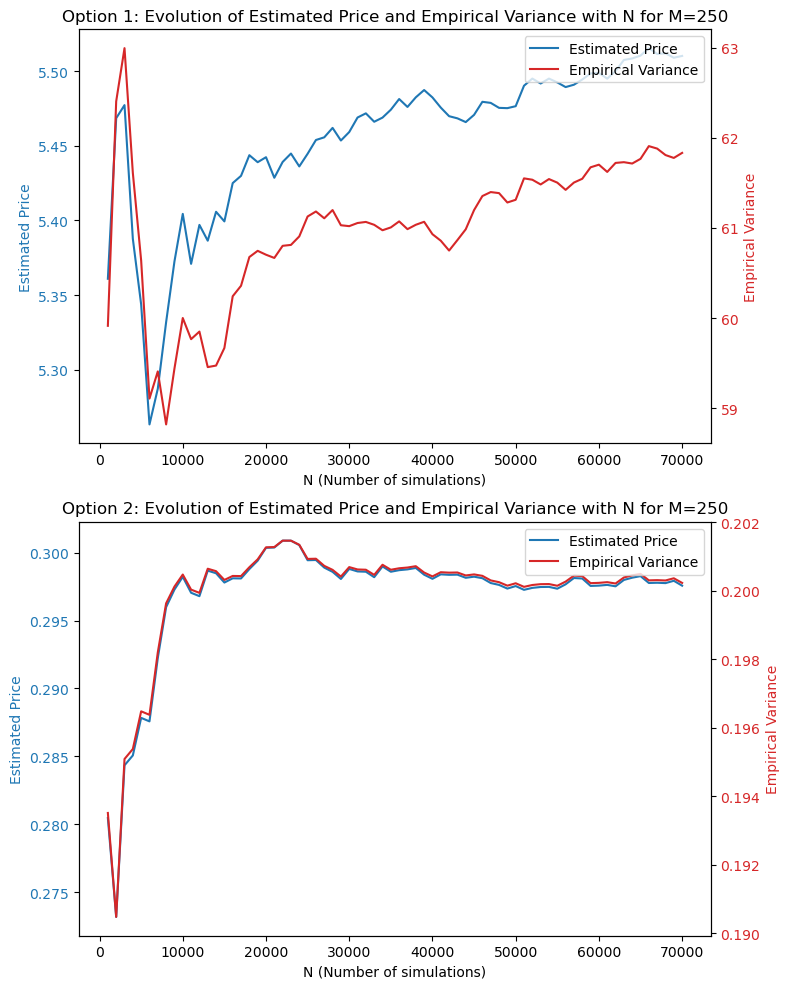

In [6]:
pricing(70000,50)
pricing(70000,150)
pricing(70000,250)

### Question b)

In [7]:
def finite_difference(eps,N,M):
    # List of N
    X = list(range(1000, N+1, 1000))
    # Lists for deltas(x), D1 for option 1 and D2 for option 2
    D1 = []
    D2 = []
    # Lists for empirical variances of the estimator
    V1 = []
    V2 = []
    for i in X:
        
        gaussian=np.random.randn(N, M+1)
        
        exp_gaussian_plus=np.exp((r-(1/2)*(sigma**2))*(T/M)+sigma*np.sqrt(T/M)*gaussian)
        exp_gaussian_plus[:, 0] = x + eps
        
        exp_gaussian_minus=np.exp((r-(1/2)*(sigma**2))*(T/M)+sigma*np.sqrt(T/M)*gaussian)
        exp_gaussian_minus[:, 0] = x - eps
        
        trajectories_plus=np.cumprod(exp_gaussian_plus,axis=1)
        trajectories_minus=np.cumprod(exp_gaussian_minus,axis=1)
      
        stock_integral_plus = (T/M) * np.sum(trajectories_plus, axis=1)
        stock_integral_minus = (T/M) * np.sum(trajectories_minus, axis=1)
        
        payoff1_plus=np.exp(-r*T)*np.maximum(stock_integral_plus-K1,0)
        payoff1_minus=np.exp(-r*T)*np.maximum(stock_integral_minus-K1,0)

        payoff2_plus=np.exp(-r*T)*np.where((stock_integral_plus >= K1) & (stock_integral_plus <= K2), 1, 0)
        payoff2_minus=np.exp(-r*T)*np.where((stock_integral_minus >= K1) & (stock_integral_minus <= K2), 1, 0)

        derivative1=(payoff1_plus-payoff1_minus)/eps
        derivative2=(payoff2_plus-payoff2_minus)/eps

        D1.append(monte_carlo(derivative1)[0])
        D2.append(monte_carlo(derivative2)[0])
        V1.append(monte_carlo(derivative1)[1])
        V2.append(monte_carlo(derivative2)[1])
        
        if i == N:
            result1 = monte_carlo(derivative1)
            result2 = monte_carlo(derivative2)
            print(f"For N={N} and M={M}:\n"
                  f"Option 1:\n"
                  f"\t- Estimated delta: {result1[0]}\n"
                  f"\t- Empirical variance: {result1[1]}\n"
                  f"\t- 95% confidence interval: {result1[2]}\n"
                  f"Option 2:\n"
                  f"\t- Estimated delta: {result2[0]}\n"
                  f"\t- Empirical variance: {result2[1]}\n"
                  f"\t- 95% confidence interval: {result2[2]}")
    
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 10))

    # Plot for P1 against X on the primary y-axis
    color = 'tab:blue'
    ax1.set_xlabel('N (Number of simulations)')
    ax1.set_ylabel('Estimated Delta', color=color)
    ax1.plot(X, D1, color=color, label='Estimated Delta')
    ax1.tick_params(axis='y', labelcolor=color)

    # Secondary y-axis for V1
    ax1_2 = ax1.twinx()
    color = 'tab:red'
    ax1_2.set_ylabel('Empirical Variance', color=color)
    ax1_2.plot(X, V1, color=color, label='Empirical Variance')
    ax1_2.tick_params(axis='y', labelcolor=color)

    # Title for the first plot
    ax1.set_title(f'Option 1 (FDM) : Evolution of Estimated Delta and Empirical Variance with N for M={M}')

    # Combine legends for the first plot
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax1_2.get_legend_handles_labels()
    ax1_2.legend(lines + lines2, labels + labels2, loc='upper right')

    # Plot for P2 against X on the secondary y-axis
    color = 'tab:blue'
    ax2.set_xlabel('N (Number of simulations)')
    ax2.set_ylabel('Estimated Delta', color=color)
    ax2.plot(X, D2, color=color, label='Estimated Delta')
    ax2.tick_params(axis='y', labelcolor=color)

    # Secondary y-axis for V2
    ax2_2 = ax2.twinx()
    color = 'tab:red'
    ax2_2.set_ylabel('Empirical Variance', color=color)
    ax2_2.plot(X, V2, color=color, label='Empirical Variance')
    ax2_2.tick_params(axis='y', labelcolor=color)

    # Title for the second plot
    ax2.set_title(f'Option 2 (FDM) : Evolution of Estimated Delta and Empirical Variance with N for M={M}')

    # Combine legends for the second plot
    lines, labels = ax2.get_legend_handles_labels()
    lines2, labels2 = ax2_2.get_legend_handles_labels()
    ax2_2.legend(lines + lines2, labels + labels2, loc='upper right')

    plt.tight_layout()
    plt.show()

For N=70000 and M=50:
Option 1:
	- Estimated delta: 1.2747486979096416
	- Empirical variance: 1.1438512591355439
	- 95% confidence interval: (1.2668256582718915, 1.2826717375473917)
Option 2:
	- Estimated delta: 0.13863507622121546
	- Empirical variance: 1345.358685435996
	- 95% confidence interval: (-0.13308773227436788, 0.4103578847167988)


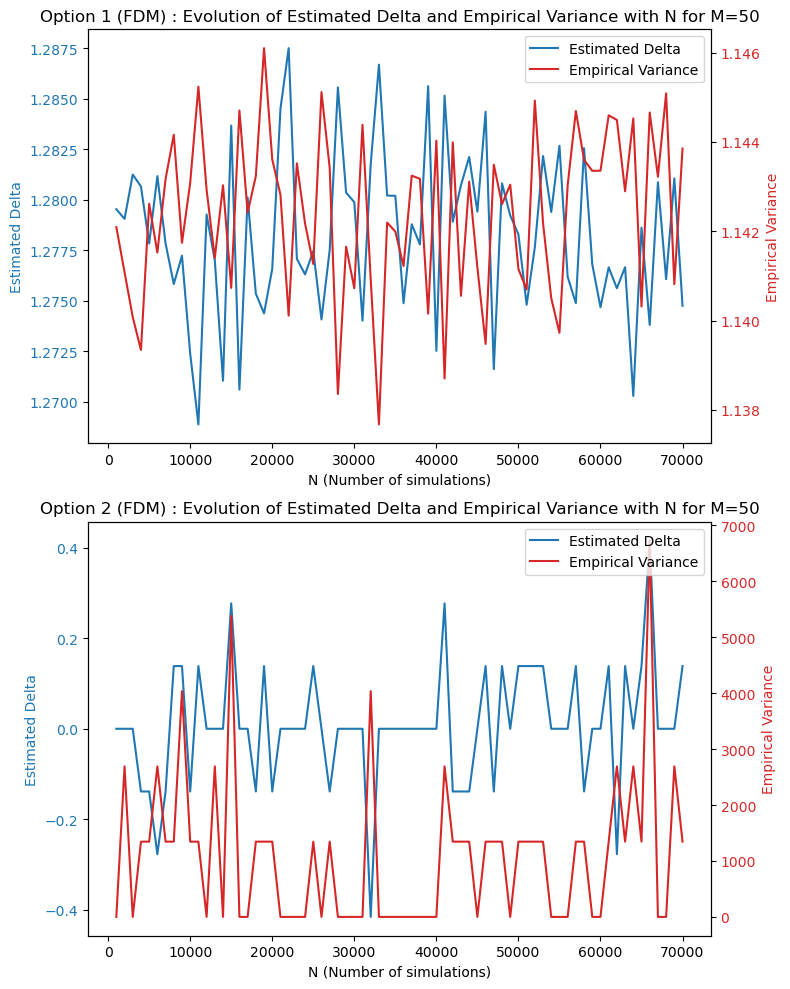

For N=70000 and M=150:
Option 1:
	- Estimated delta: 1.180720261486238
	- Empirical variance: 1.1581896228893493
	- 95% confidence interval: (1.1727477181966617, 1.1886928047758143)
Option 2:
	- Estimated delta: 0.0
	- Empirical variance: 0.0
	- 95% confidence interval: (0.0, 0.0)


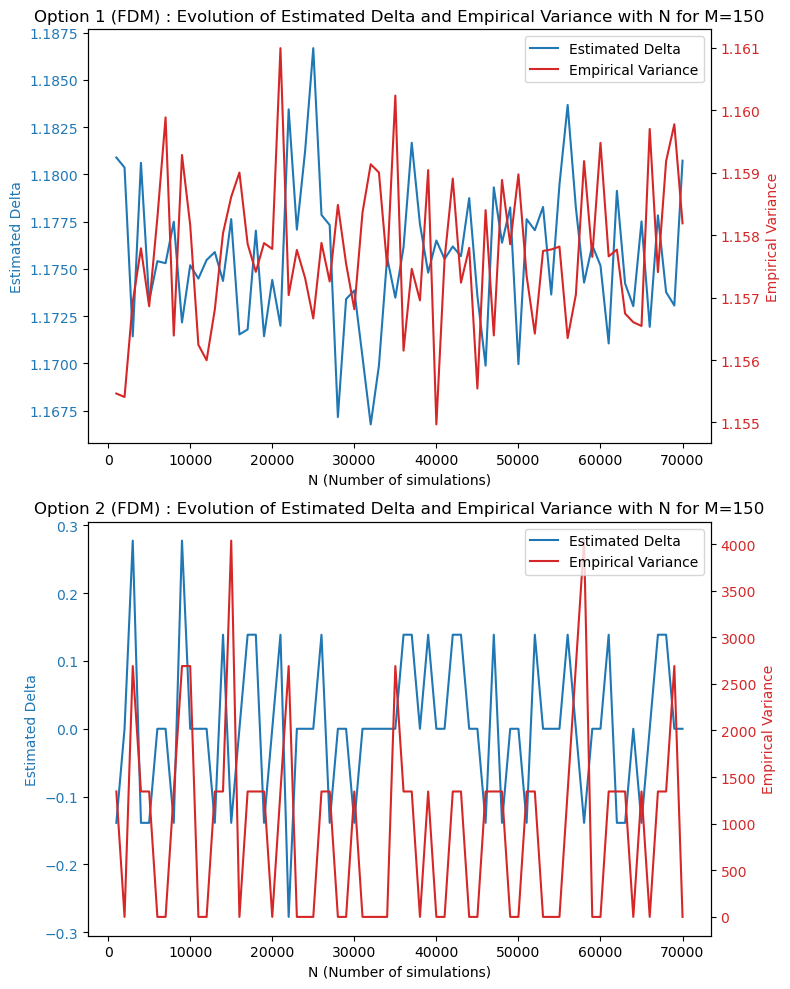

For N=70000 and M=250:
Option 1:
	- Estimated delta: 1.1474944861682725
	- Empirical variance: 1.160117384090737
	- 95% confidence interval: (1.139515310644517, 1.155473661692028)
Option 2:
	- Estimated delta: 0.13863507622121546
	- Empirical variance: 1345.358685435996
	- 95% confidence interval: (-0.13308773227436788, 0.4103578847167988)


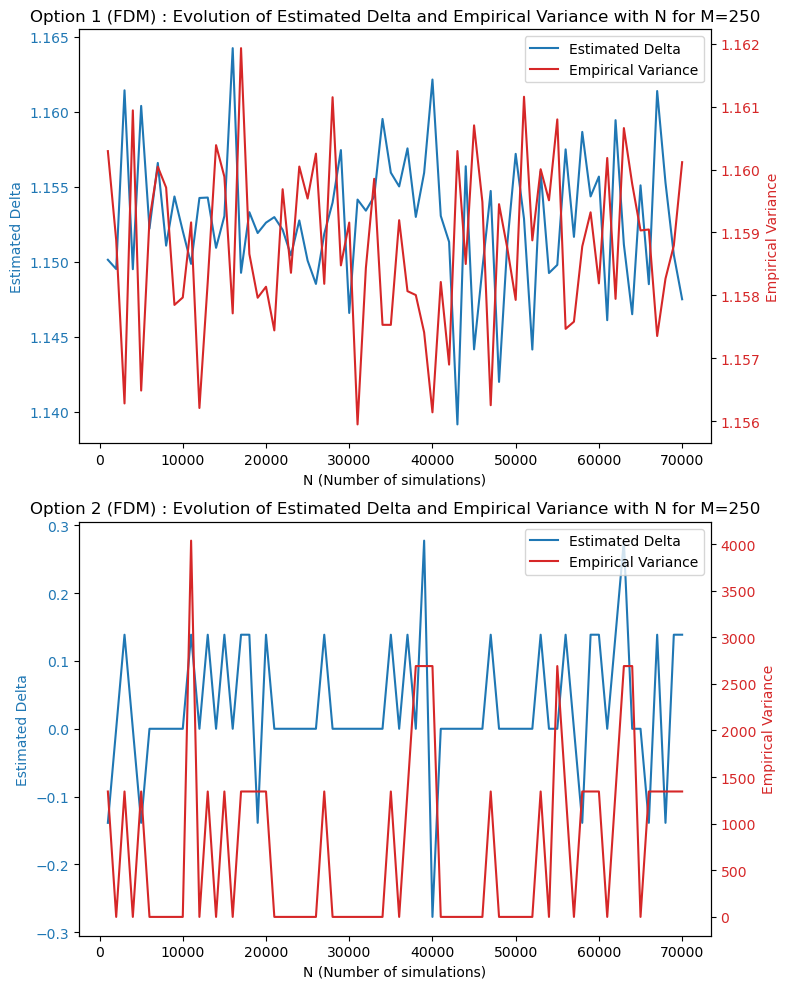

For N=70000 and M=50:
Option 1:
	- Estimated delta: 1.2825598218748608
	- Empirical variance: 1.1408312675611447
	- 95% confidence interval: (1.2746472483387883, 1.2904723954109334)
Option 2:
	- Estimated delta: 0.009704455335485083
	- Empirical variance: 11.435618017069668
	- 95% confidence interval: (-0.015347225581706545, 0.03475613625267671)


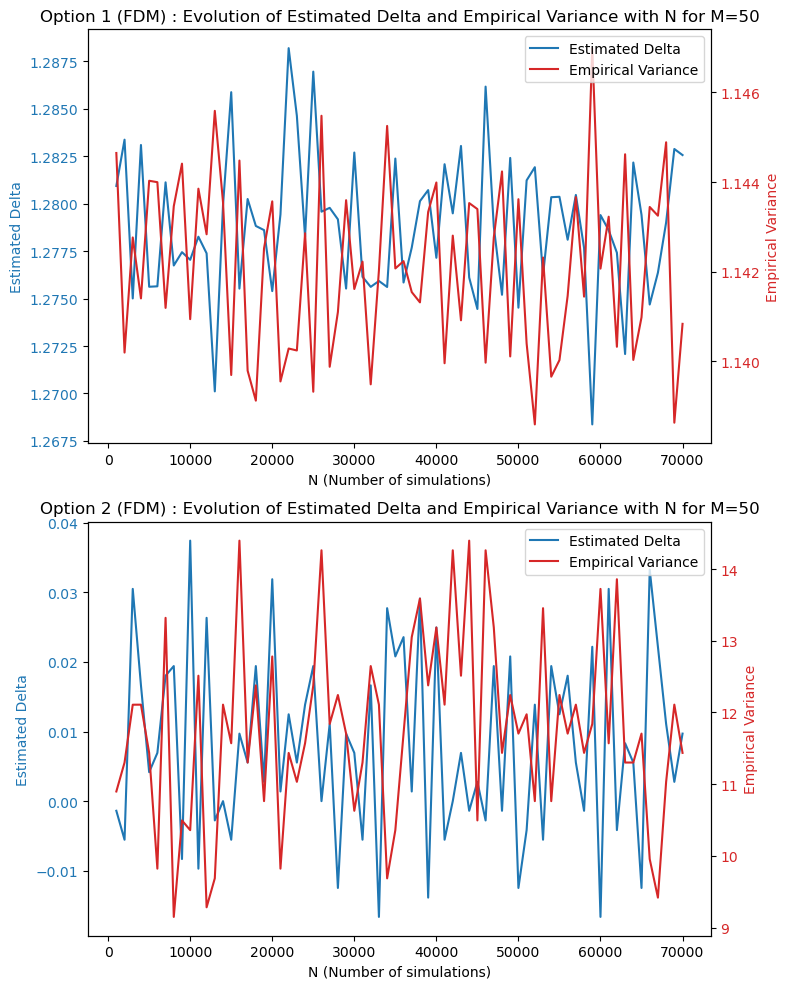

For N=70000 and M=150:
Option 1:
	- Estimated delta: 1.1714510289935955
	- Empirical variance: 1.1577586622734537
	- 95% confidence interval: (1.1634799691277078, 1.1794220888594833)
Option 2:
	- Estimated delta: 0.008318104573272929
	- Empirical variance: 13.72278544136394
	- 95% confidence interval: (-0.019124680726729928, 0.03576088987327579)


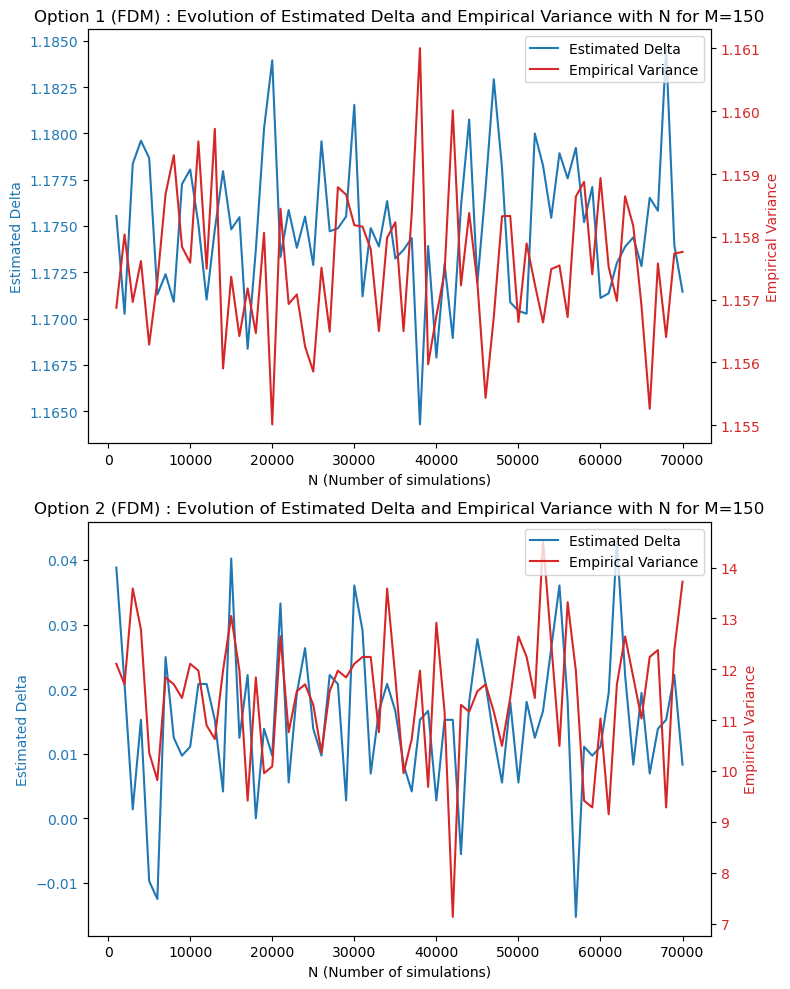

For N=70000 and M=250:
Option 1:
	- Estimated delta: 1.1505239129404035
	- Empirical variance: 1.1597616170007767
	- 95% confidence interval: (1.1425459609763338, 1.1585018649044732)
Option 2:
	- Estimated delta: 0.02495431371981878
	- Empirical variance: 9.417022618069259
	- 95% confidence interval: (0.002220941746447984, 0.047687685693189576)


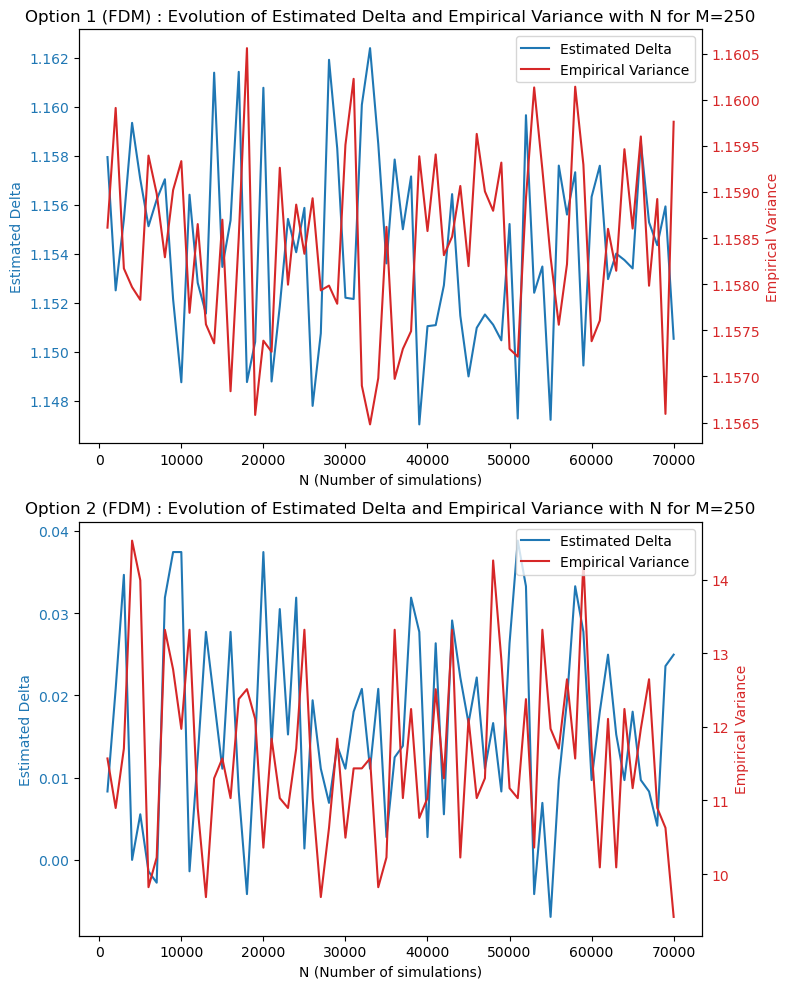

In [8]:
finite_difference(10**(-4),70000,50)
finite_difference(10**(-4),70000,150)
finite_difference(10**(-4),70000,250)

finite_difference(10**(-2),70000,50)
finite_difference(10**(-2),70000,150)
finite_difference(10**(-2),70000,250)

### Question c)

In [9]:
def method_A(N,M):
    # List of N
    X = list(range(1000, N+1, 1000))
    # Lists for Deltas, D1 for option 1 and D2 for option 2
    D1 = []
    D2 = []
    # Lists for empirical variances of the estimator
    V1 = []
    V2 = []
    for i in X:
        trajectories, gaussian = trajectories_and_gaussian(x, r, sigma, T, M, i, seed=42)
        stock_integral = (T/M) * np.sum(trajectories, axis=1)
        
        Pi=gaussian[:, 1]/(x*np.sqrt(T/M)*sigma)
        
        function1=np.exp(-r*T)*np.maximum(stock_integral-K1,0)*Pi
        function2=np.exp(-r*T)*np.where((stock_integral >= K1) & (stock_integral <= K2), 1, 0)*Pi
        
        D1.append(monte_carlo(function1)[0])
        D2.append(monte_carlo(function2)[0])
        V1.append(monte_carlo(function1)[1])
        V2.append(monte_carlo(function2)[1])
        
        if i == N:
            result1 = monte_carlo(function1)
            result2 = monte_carlo(function2)
            print(f"For N={N} and M={M}:\n"
                  f"Option 1:\n"
                  f"\t- Estimated Delta: {result1[0]}\n"
                  f"\t- Empirical variance: {result1[1]}\n"
                  f"\t- 95% confidence interval: {result1[2]}\n"
                  f"Option 2:\n"
                  f"\t- Estimated Delta: {result2[0]}\n"
                  f"\t- Empirical variance: {result2[1]}\n"
                  f"\t- 95% confidence interval: {result2[2]}")
            
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 10))

    # Plot for P1 against X on the primary y-axis
    color = 'tab:blue'
    ax1.set_xlabel('N (Number of simulations)')
    ax1.set_ylabel('Estimated Delta', color=color)
    ax1.plot(X, D1, color=color, label='Estimated Delta')
    ax1.tick_params(axis='y', labelcolor=color)

    # Secondary y-axis for V1
    ax1_2 = ax1.twinx()
    color = 'tab:red'
    ax1_2.set_ylabel('Empirical Variance', color=color)
    ax1_2.plot(X, V1, color=color, label='Empirical Variance')
    ax1_2.tick_params(axis='y', labelcolor=color)

    # Title for the first plot
    ax1.set_title(f'Option 1 (Method A) : Evolution of Estimated Delta and Empirical Variance with N for M={M}')

    # Combine legends for the first plot
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax1_2.get_legend_handles_labels()
    ax1_2.legend(lines + lines2, labels + labels2, loc='upper right')

    # Plot for P2 against X on the secondary y-axis
    color = 'tab:blue'
    ax2.set_xlabel('N (Number of simulations)')
    ax2.set_ylabel('Estimated Delta', color=color)
    ax2.plot(X, D2, color=color, label='Estimated Delta')
    ax2.tick_params(axis='y', labelcolor=color)

    # Secondary y-axis for V2
    ax2_2 = ax2.twinx()
    color = 'tab:red'
    ax2_2.set_ylabel('Empirical Variance', color=color)
    ax2_2.plot(X, V2, color=color, label='Empirical Variance')
    ax2_2.tick_params(axis='y', labelcolor=color)

    # Title for the second plot
    ax2.set_title(f'Option 2 (Method A) : Evolution of Estimated Delta and Empirical Variance with N for M={M}')

    # Combine legends for the second plot
    lines, labels = ax2.get_legend_handles_labels()
    lines2, labels2 = ax2_2.get_legend_handles_labels()
    ax2_2.legend(lines + lines2, labels + labels2, loc='upper right')

    plt.tight_layout()
    plt.show()    

In [10]:
def method_B(N,M):
    # List of N
    X = list(range(1000, N+1, 1000))
    # Lists for Deltas, D1 for option 1 and D2 for option 2
    D1 = []
    D2 = []
    # Lists for empirical variances of the estimator
    V1 = []
    V2 = []
    for i in X:
        trajectories = trajectories_and_gaussian(x, r, sigma, T, M, i, seed=42)[0]
        stock_integral = (T/M) * np.sum(trajectories, axis=1)
        
        Pi=(2/x)*((trajectories[:, -1]-x-r*stock_integral)/((sigma**2)*stock_integral) + 1/2)

        function1=np.exp(-r*T)*np.maximum(stock_integral-K1,0)*Pi
        function2=np.exp(-r*T)*np.where((stock_integral >= K1) & (stock_integral <= K2), 1, 0)*Pi

        
        D1.append(monte_carlo(function1)[0])
        D2.append(monte_carlo(function2)[0])
        V1.append(monte_carlo(function1)[1])
        V2.append(monte_carlo(function2)[1])
        
        if i == N:
            result1 = monte_carlo(function1)
            result2 = monte_carlo(function2)
            print(f"For N={N} and M={M}:\n"
                  f"Option 1:\n"
                  f"\t- Estimated Delta: {result1[0]}\n"
                  f"\t- Empirical variance: {result1[1]}\n"
                  f"\t- 95% confidence interval: {result1[2]}\n"
                  f"Option 2:\n"
                  f"\t- Estimated Delta: {result2[0]}\n"
                  f"\t- Empirical variance: {result2[1]}\n"
                  f"\t- 95% confidence interval: {result2[2]}")
            
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 10))

    # Plot for P1 against X on the primary y-axis
    color = 'tab:blue'
    ax1.set_xlabel('N (Number of simulations)')
    ax1.set_ylabel('Estimated Delta', color=color)
    ax1.plot(X, D1, color=color, label='Estimated Delta')
    ax1.tick_params(axis='y', labelcolor=color)

    # Secondary y-axis for V1
    ax1_2 = ax1.twinx()
    color = 'tab:red'
    ax1_2.set_ylabel('Empirical Variance', color=color)
    ax1_2.plot(X, V1, color=color, label='Empirical Variance')
    ax1_2.tick_params(axis='y', labelcolor=color)

    # Title for the first plot
    ax1.set_title(f'Option 1 (Method B) : Evolution of Estimated Delta and Empirical Variance with N for M={M}')

    # Combine legends for the first plot
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax1_2.get_legend_handles_labels()
    ax1_2.legend(lines + lines2, labels + labels2, loc='upper right')

    # Plot for P2 against X on the secondary y-axis
    color = 'tab:blue'
    ax2.set_xlabel('N (Number of simulations)')
    ax2.set_ylabel('Estimated Delta', color=color)
    ax2.plot(X, D2, color=color, label='Estimated Delta')
    ax2.tick_params(axis='y', labelcolor=color)

    # Secondary y-axis for V2
    ax2_2 = ax2.twinx()
    color = 'tab:red'
    ax2_2.set_ylabel('Empirical Variance', color=color)
    ax2_2.plot(X, V2, color=color, label='Empirical Variance')
    ax2_2.tick_params(axis='y', labelcolor=color)

    # Title for the second plot
    ax2.set_title(f'Option 2 (Method B) : Evolution of Estimated Delta and Empirical Variance with N for M={M}')

    # Combine legends for the second plot
    lines, labels = ax2.get_legend_handles_labels()
    lines2, labels2 = ax2_2.get_legend_handles_labels()
    ax2_2.legend(lines + lines2, labels + labels2, loc='upper right')

    plt.tight_layout()
    plt.show()    

For N=70000 and M=50:
Option 1:
	- Estimated Delta: 0.6276164031366733
	- Empirical variance: 15.467371985168
	- 95% confidence interval: (0.5984813834087579, 0.6567514228645888)
Option 2:
	- Estimated Delta: 0.004875072572418096
	- Empirical variance: 0.03580733414551423
	- 95% confidence interval: (0.0034732500095001565, 0.006276895135336035)


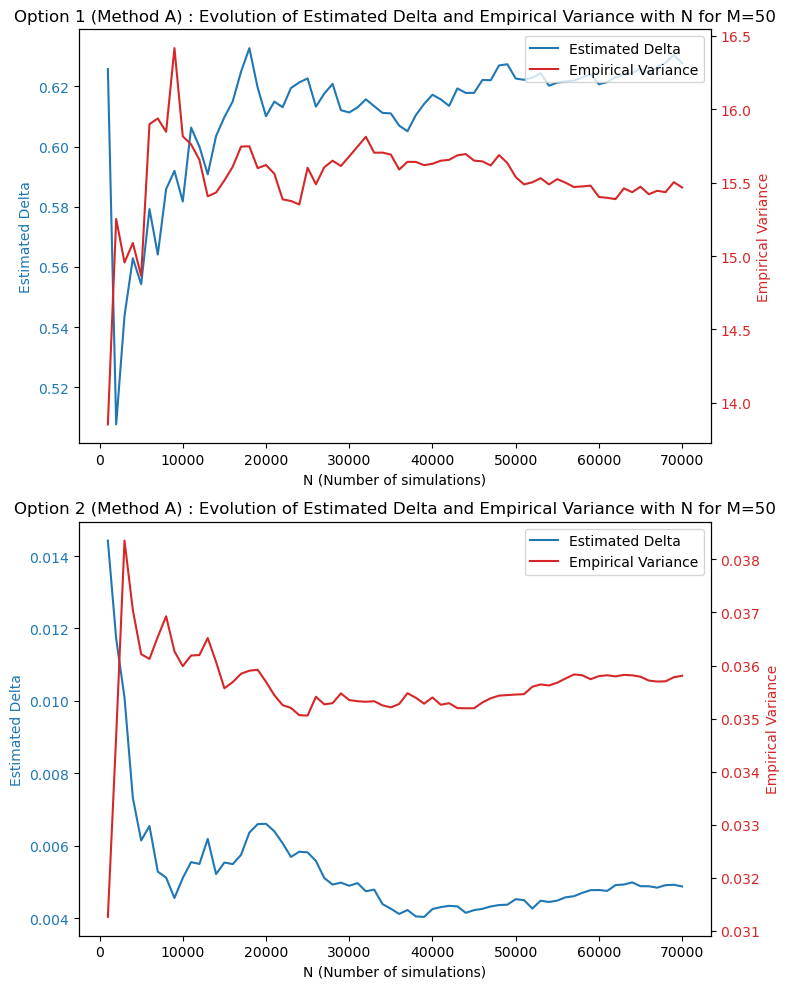

For N=70000 and M=150:
Option 1:
	- Estimated Delta: 0.5456028768395367
	- Empirical variance: 36.52108394886729
	- 95% confidence interval: (0.5008337235404867, 0.5903720301385866)
Option 2:
	- Estimated Delta: 0.005994376929015457
	- Empirical variance: 0.10640785454352251
	- 95% confidence interval: (0.0035778374492327417, 0.008410916408798172)


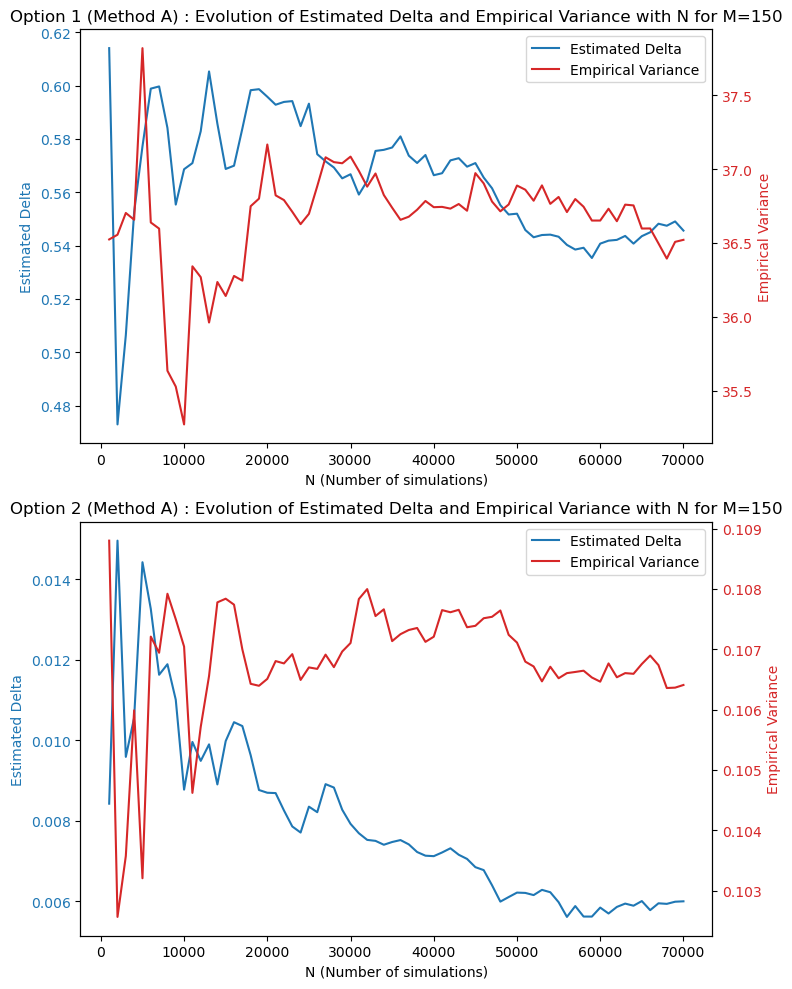

For N=70000 and M=250:
Option 1:
	- Estimated Delta: 0.6049427682385833
	- Empirical variance: 58.826519534191654
	- 95% confidence interval: (0.5481237626855429, 0.6617617737916237)
Option 2:
	- Estimated Delta: 0.007190921502113057
	- Empirical variance: 0.18136277237656948
	- 95% confidence interval: (0.004036054001246162, 0.010345789002979952)


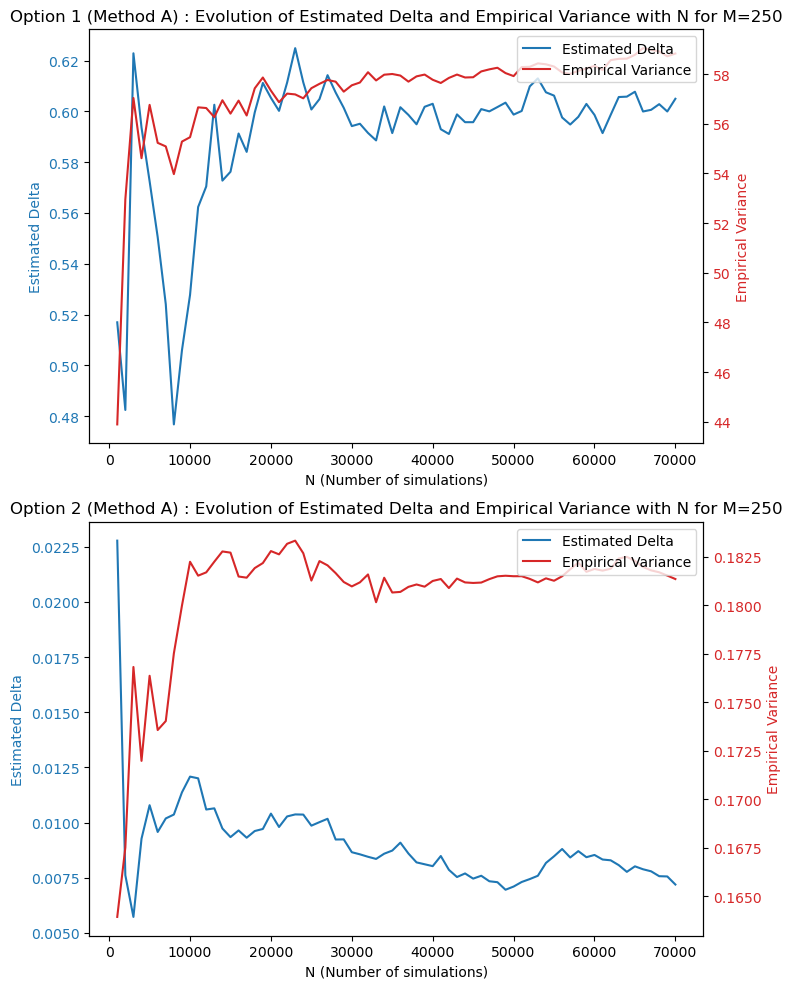

In [11]:
method_A(70000,50)
method_A(70000,150)
method_A(70000,250)

For N=70000 and M=50:
Option 1:
	- Estimated Delta: 0.6203329407827756
	- Empirical variance: 2.1127775793190318
	- 95% confidence interval: (0.6095649681995532, 0.6311009133659979)
Option 2:
	- Estimated Delta: 0.004752908752319181
	- Empirical variance: 0.0008728736148235929
	- 95% confidence interval: (0.004534040518028504, 0.004971776986609858)


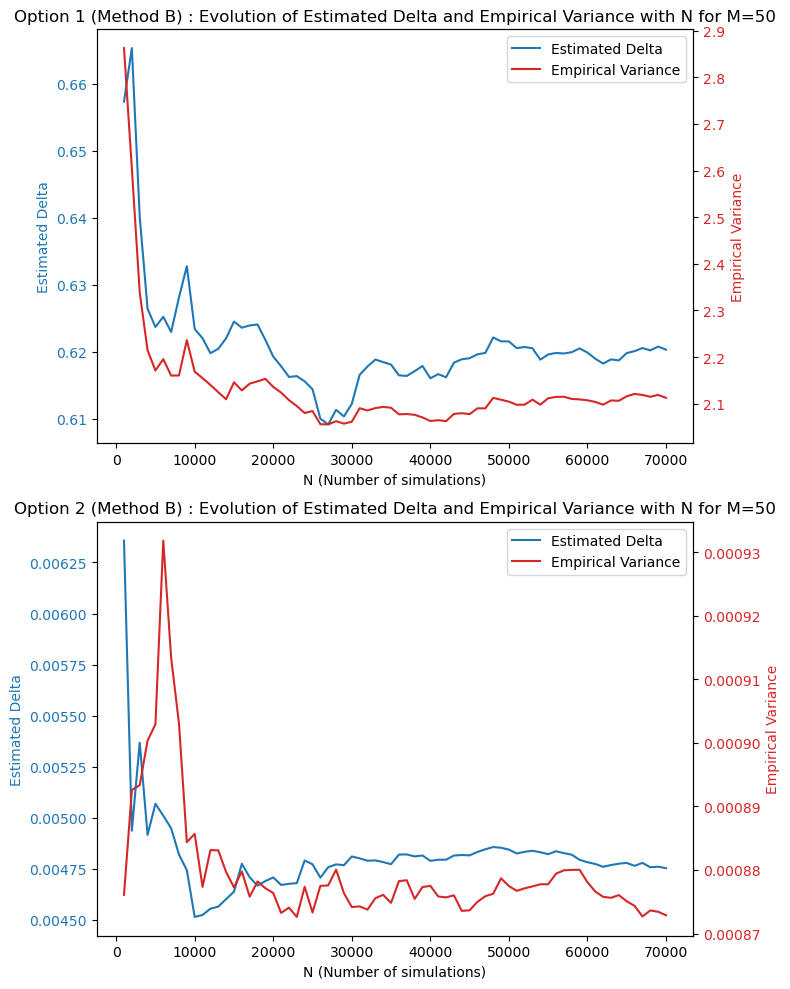

For N=70000 and M=150:
Option 1:
	- Estimated Delta: 0.5732772645316332
	- Empirical variance: 1.8789529115655526
	- 95% confidence interval: (0.5631226135880154, 0.583431915475251)
Option 2:
	- Estimated Delta: 0.0075345824053465
	- Empirical variance: 0.0009704666529756651
	- 95% confidence interval: (0.007303802835377006, 0.007765361975315994)


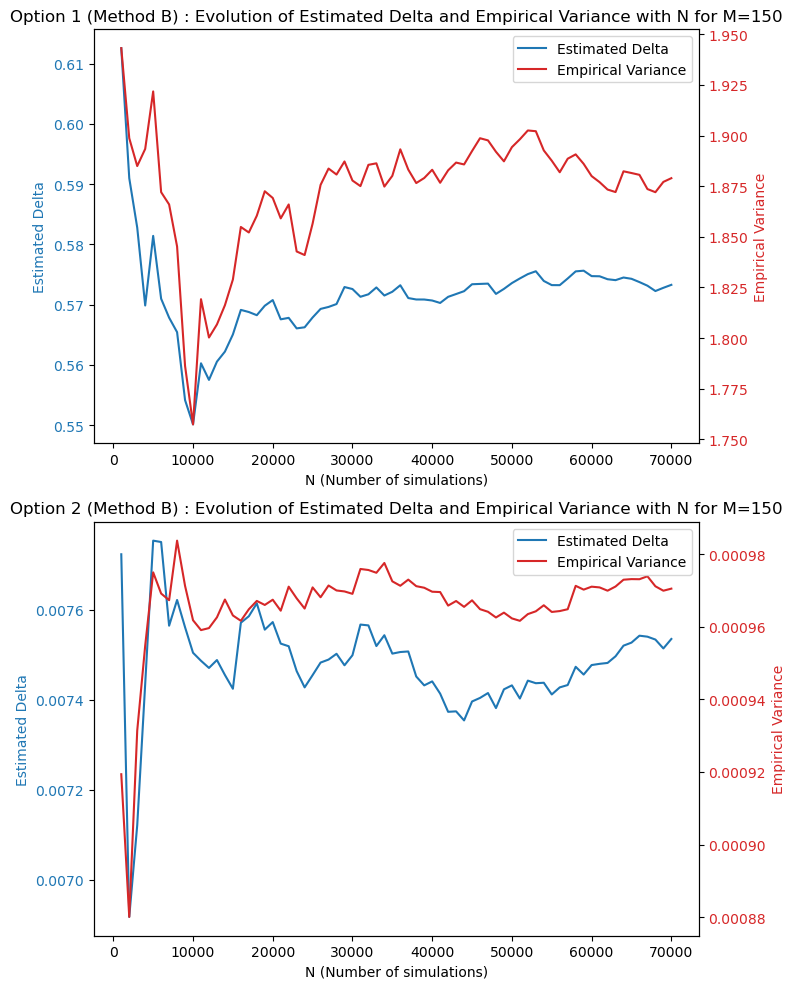

For N=70000 and M=250:
Option 1:
	- Estimated Delta: 0.5709182975004268
	- Empirical variance: 1.8795418078614492
	- 95% confidence interval: (0.5607620553599776, 0.581074539640876)
Option 2:
	- Estimated Delta: 0.007858598049054128
	- Empirical variance: 0.000980269189938483
	- 95% confidence interval: (0.0076266558727605014, 0.008090540225347755)


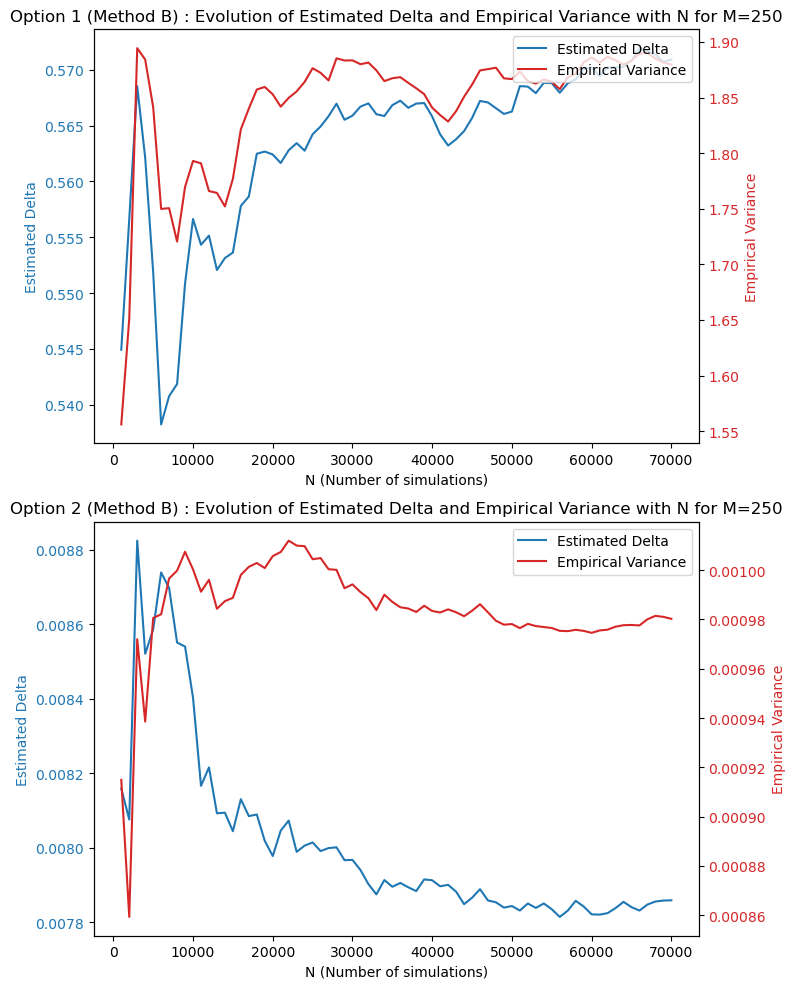

In [12]:
method_B(70000,50)
method_B(70000,150)
method_B(70000,250)